# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# Data

- ID : Customer ID.
- Age : Customer Age.
- Experience : Years of professional experience.
- Income : Anual Income of the customer / 1000.
- ZIP Code: Home Address Zip Code.
- Family : Family size of the customer.
- CCAvg : Avg. Spending on credit cards per month / 1000.
- Education : Education Level : 1. Undergard; 2. Graduate ; 3. Advanced/Professional.
- Mortgage : Value of house mortgage if any / 1000.
- Personal Loan : Did the customer accept the personal loan offered in the last campaing?
- Securities Account : Does the customer have a securities account within the bank?
- CD Account : Does the customer have a CD account within the bank?
- Online : Does the customer use internet banking facilities?
- Credit Card :  Does the customer use credit card issued by the bank?

In [2]:
# Load the data from bank_modelling.csv
bank_clients = pd.read_csv('../src/data/bank_modelling.csv')

In [3]:
# Get the first 5 rows of the dataset.
bank_clients.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
# Let's make ID the index.
bank_clients.set_index('ID', inplace=True)

# EDA

In [5]:
# Get the dtypes of the dataset.
bank_clients.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [6]:
numerical_columns = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
categorical_columns = ['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

## Data Distributions

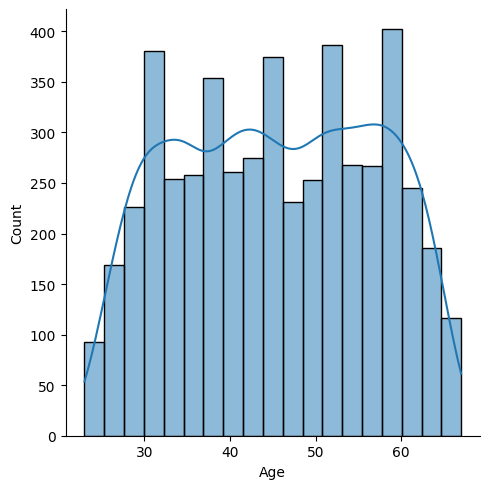

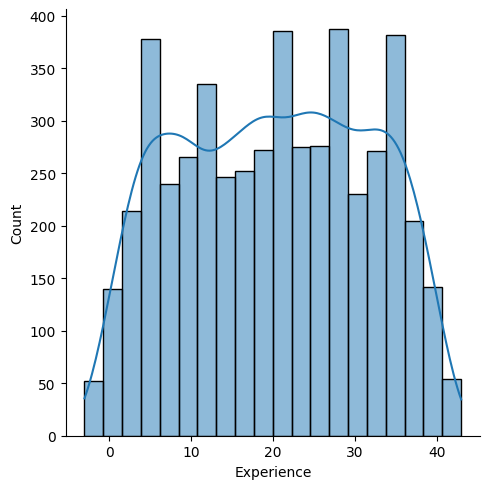

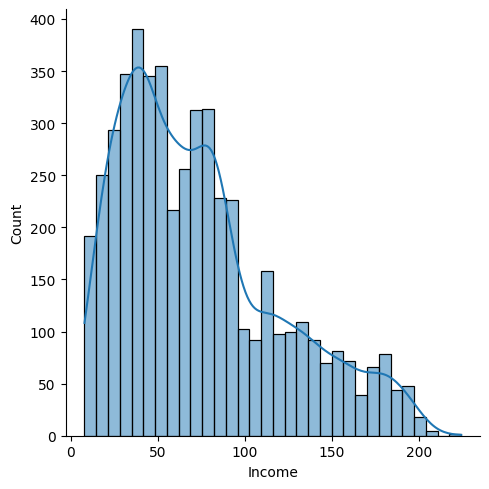

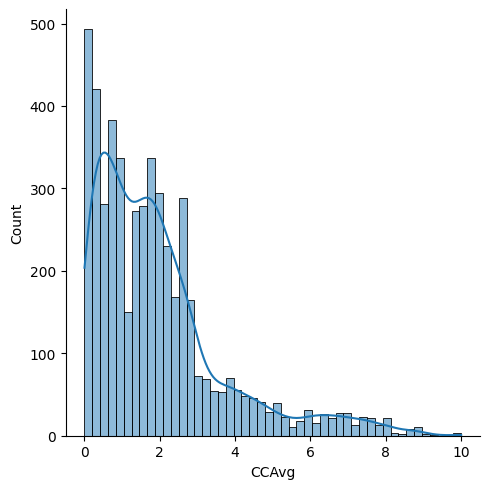

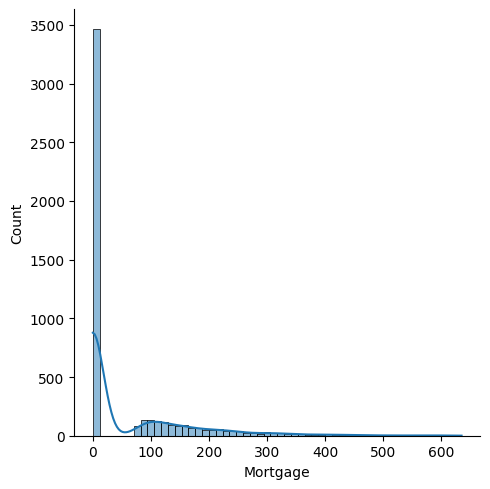

In [7]:
# Get distribution of numerical columns.
for i in numerical_columns:
    sns.displot(bank_clients[i], kde=True)
    plt.show()

In [8]:
# Print the skewness of the numerical columns.
for i in numerical_columns:
    print(f'{i}: {bank_clients[i].skew()}')

Age: -0.02934068151284029
Experience: -0.026324688402384513
Income: 0.8413386072610816
CCAvg: 1.5984433366678663
Mortgage: 2.1040023191079444


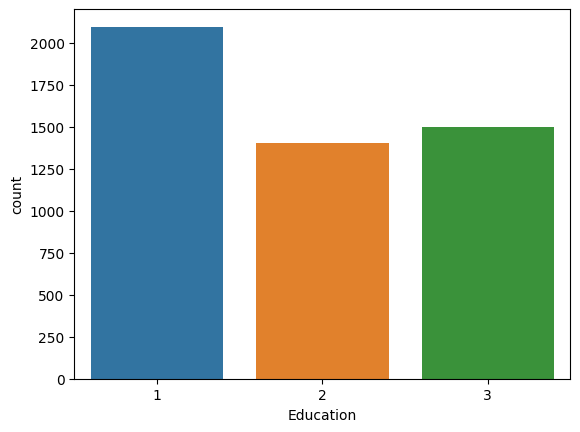

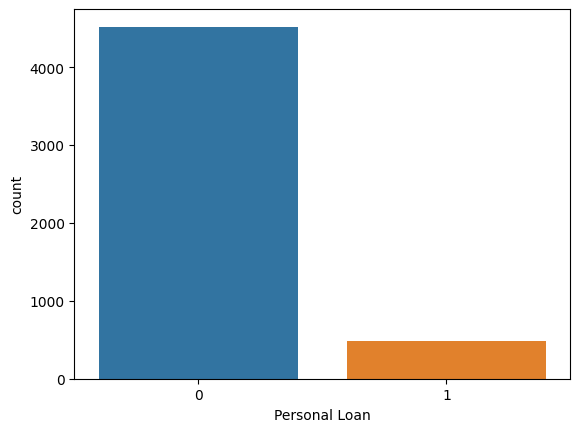

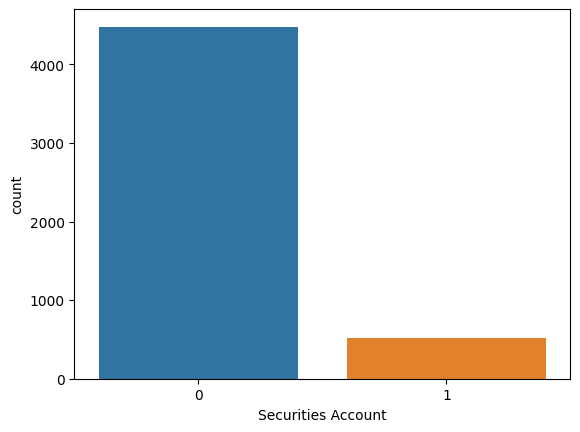

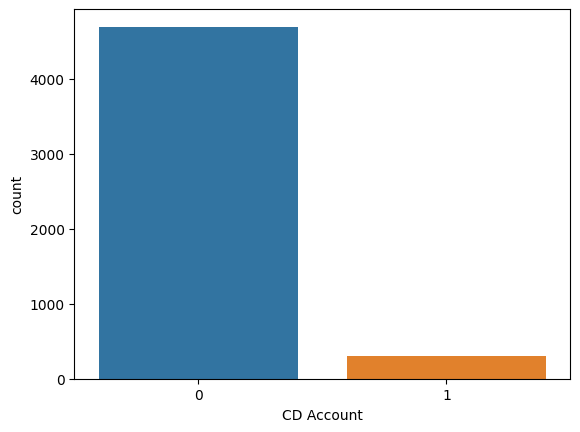

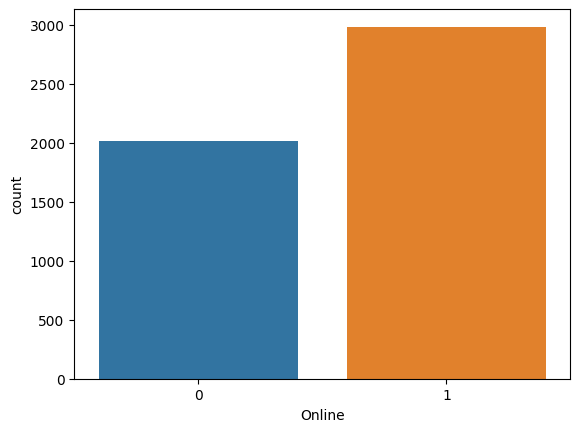

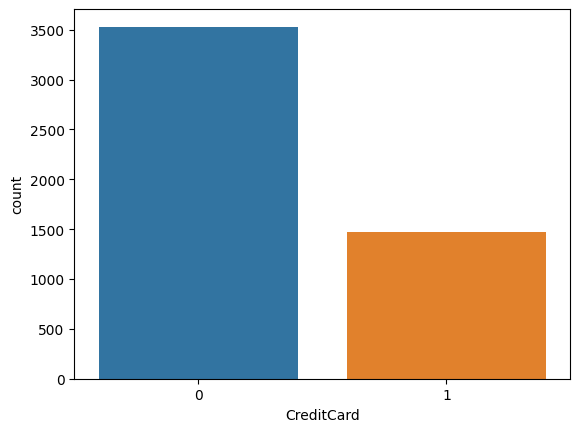

In [9]:
# Get countplot of categorical columns.
for i in categorical_columns:
    sns.countplot(x=i, data=bank_clients)
    plt.show()

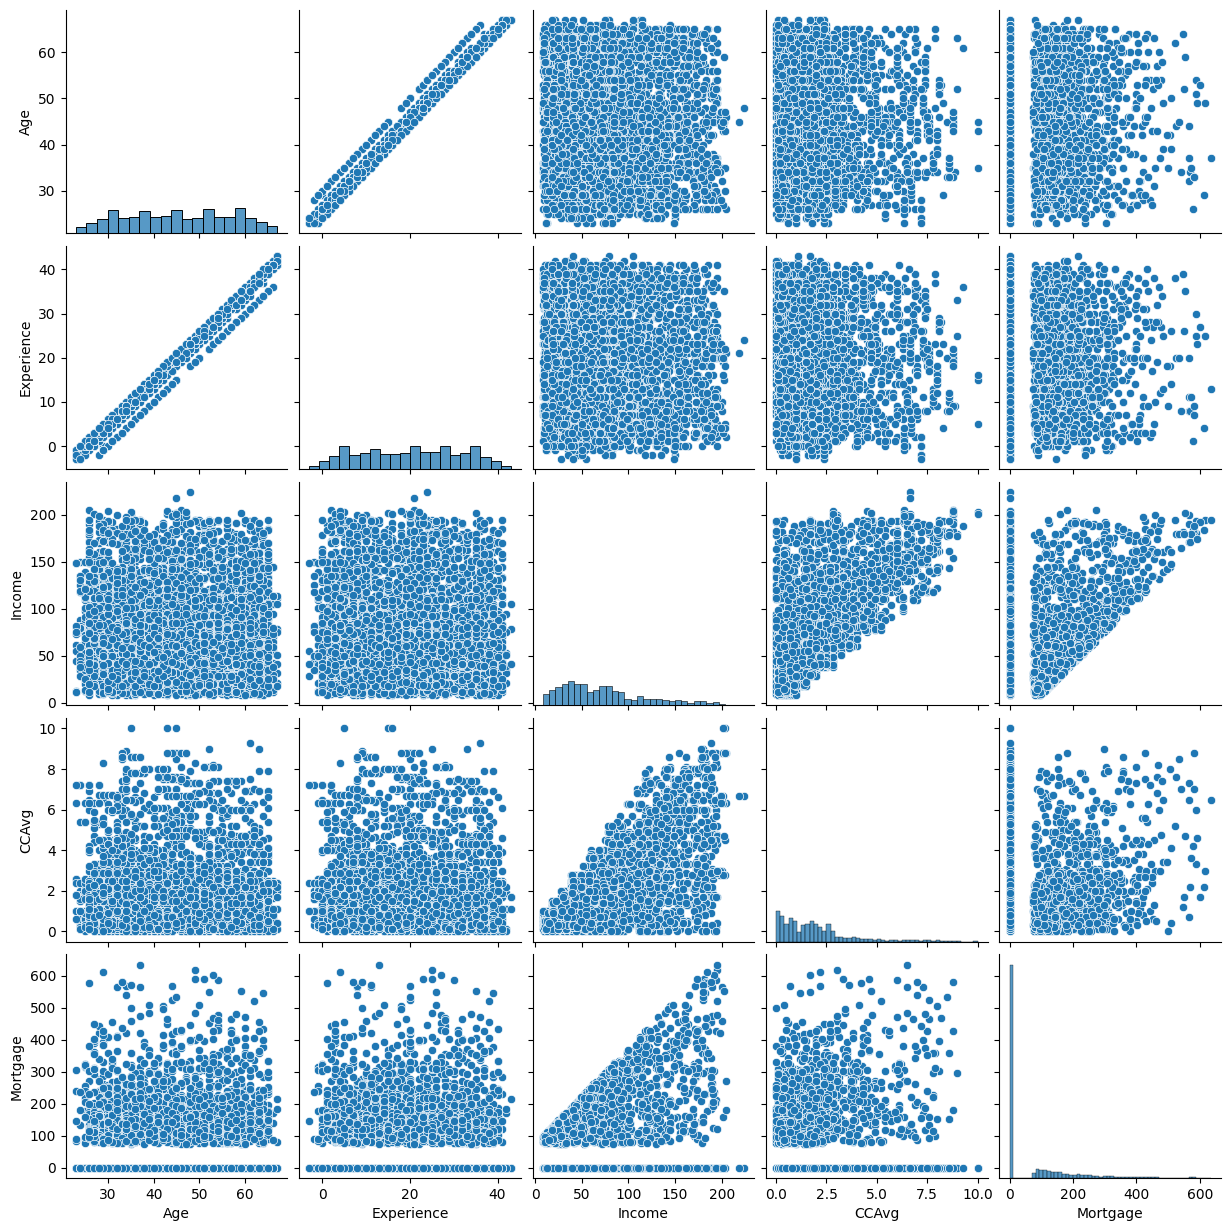

In [10]:
# Get pair plot of every column.
sns.pairplot(bank_clients[numerical_columns])

<Axes: >

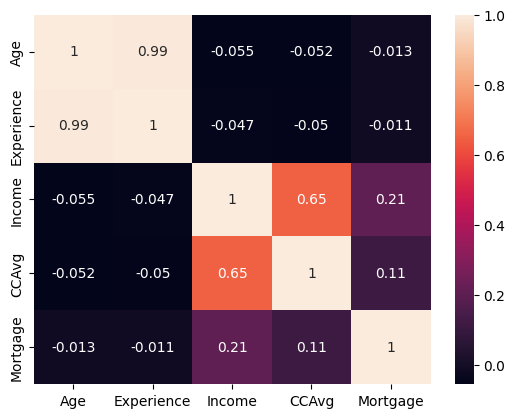

In [11]:
# Get correlation matrix of numerical columns.
sns.heatmap(bank_clients[numerical_columns].corr(), annot=True)

<Axes: >

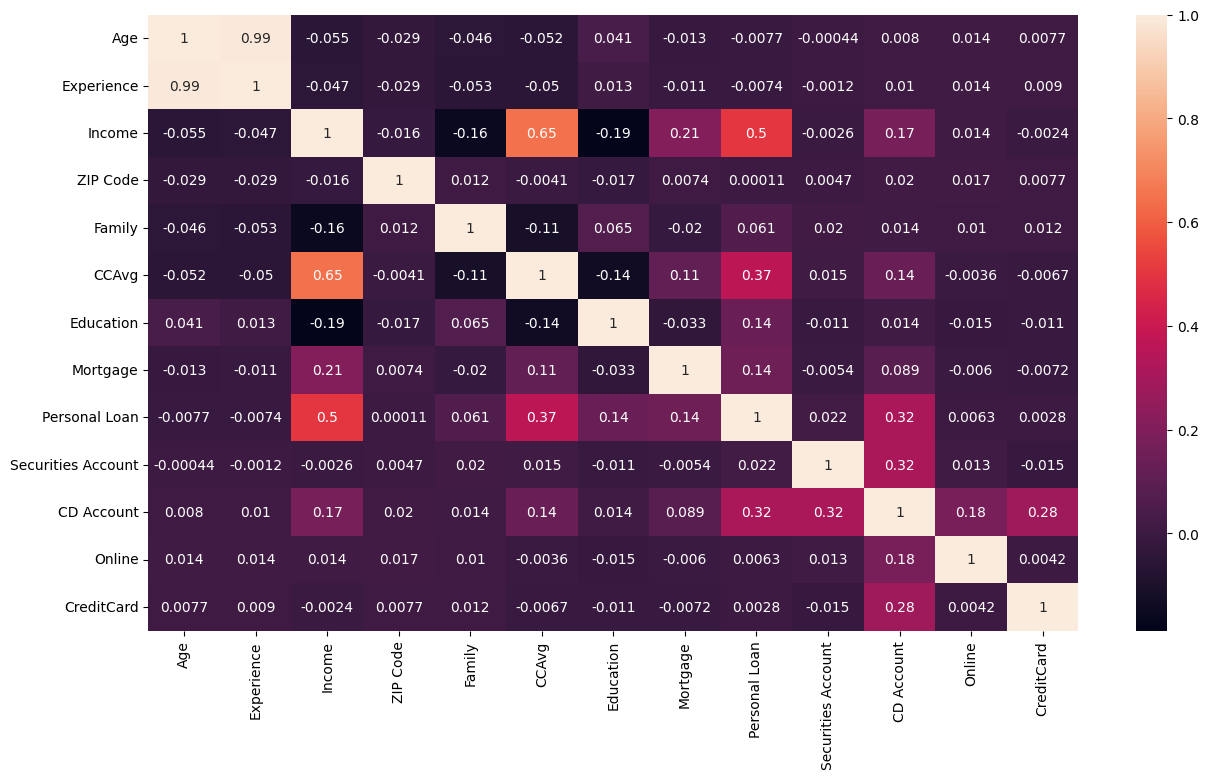

In [12]:
# Get correlation of all columns.
plt.figure(figsize = (15,8))
sns.heatmap(bank_clients.corr(), annot=True)

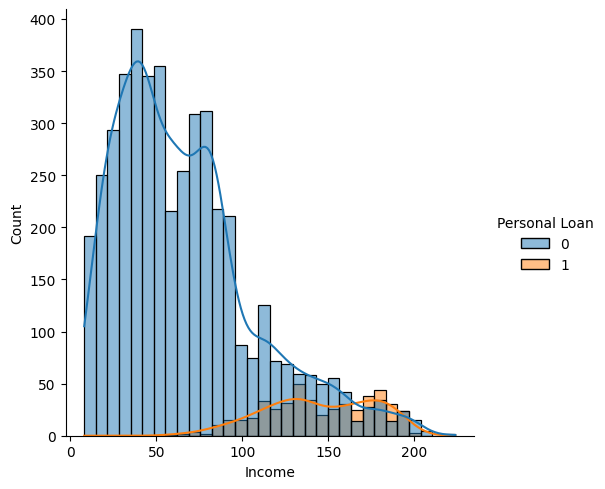

In [13]:
# Plot income distribution by Personal Loan.
sns.displot(x='Income', hue='Personal Loan', data=bank_clients, kde=True)

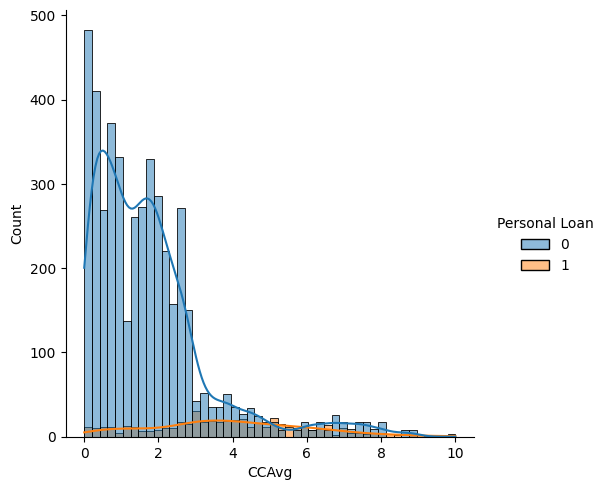

In [14]:
# Plot income distribution by Personal Loan.
sns.displot(x='CCAvg', hue='Personal Loan', data=bank_clients, kde=True)

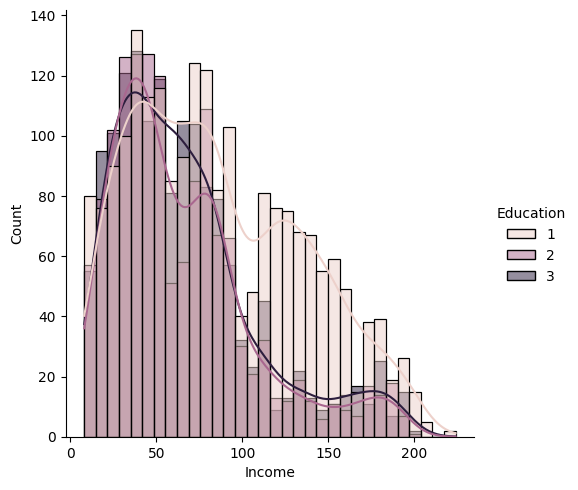

In [15]:
# Check the income distribution by education.
sns.displot(x='Income', hue='Education', data=bank_clients, kde=True)

In [16]:
# Check by smirnov test if the income distribution by education is the same.
from scipy.stats import ks_2samp
print(ks_2samp(bank_clients[bank_clients['Education'] == 1]['Income'], bank_clients[bank_clients['Education'] == 2]['Income']))
print(ks_2samp(bank_clients[bank_clients['Education'] == 1]['Income'], bank_clients[bank_clients['Education'] == 3]['Income']))
print(ks_2samp(bank_clients[bank_clients['Education'] == 2]['Income'], bank_clients[bank_clients['Education'] == 3]['Income']))

# We have evidence to say that by education the income distribution is different for 1 against 2 and 3, but not between 2 and 3.

KstestResult(statistic=0.21591749957832998, pvalue=8.381359976074654e-35, statistic_location=91, statistic_sign=-1)
KstestResult(statistic=0.20933817658456702, pvalue=4.887671871494662e-34, statistic_location=85, statistic_sign=-1)
KstestResult(statistic=0.0438201569587963, pvalue=0.11861262257260874, statistic_location=49, statistic_sign=1)


<Axes: xlabel='Income', ylabel='CCAvg'>

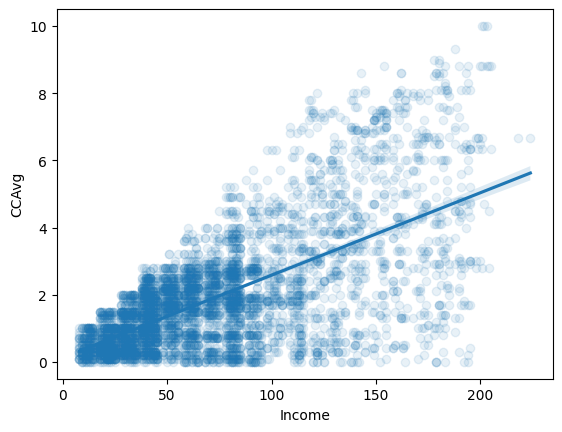

In [17]:
# Plot income and CCavg, add a regression line.
# Make the points transparent.
sns.regplot(x='Income', y='CCAvg', data=bank_clients, scatter_kws={'alpha':0.1})

In [18]:
print('Age range: ', bank_clients.Age.min(), '-', bank_clients.Age.max())

Age range:  23 - 67


### Conclusion

- Experience and Age have a high correlation.
- Age it's normally distributed between 23 and 67 years old.
- Income, CCAvg and Mortgare are right skewed.
- Education is a categorical variable with 3 levels.
- Personal Loan, Securities Account, CD Account, Online and CreditCard are categorical variables with 2 levels.
- Income have a high correlation with Personal Loan (0.5) and CCAvg (0.65).
- People with higher income tend to accept more the personal Loan.
- People with low CCAvg tend to don't accept the personal loan.

## Drop Experience.
Age and experience have a high correlation, 0.99 for this let's drop Experience.

In [19]:
# Drop Experience.
bank_clients.drop('Experience', axis=1, inplace=True)

# Data Training

## Split the data

In [20]:
# Split the data set into train and test, 70% train, 30% test.
# Using personal loan as target.
# Set the random state to 42, to make the experiment reproducible.
X_train, X_test, y_train, y_test = train_test_split(bank_clients.drop('Personal Loan', axis=1),\
                                                    bank_clients['Personal Loan'], test_size=0.3, random_state=42)

In [21]:
# Check the shape of the train and test sets.
print("X train shape: {},\n\
X test shape: {},\n\
y train shape: {},\n\
y test shape: {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X train shape: (3500, 11),
X test shape: (1500, 11),
y train shape: (3500,),
y test shape: (1500,)


## Logistic regression.

In [22]:
# Let's train a logistic regression model.
lr_model = LogisticRegression()

# Fit the model.
lr_model.fit(X_train, y_train)

LogisticRegression()

In [23]:
# Get the predictions.
lr_y_pred = lr_model.predict(X_test)

# Get the accuracy score.
print('Accuracy score for Logistic regression: ', accuracy_score(y_test, lr_y_pred))

Accuracy score for Logistic regression:  0.9013333333333333


## Knn classificator.

In [24]:
# Let's train a knn model.
knn_model = KNeighborsClassifier()

# Fit the model.
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
# Get the predictions.
knn_y_pred = knn_model.predict(X_test)

# Get the accuracy score.
print('Accuracy score for KNN: ', accuracy_score(y_test, knn_y_pred))

Accuracy score for KNN:  0.8966666666666666


# Naive Bayes classificator.

In [26]:
# Let's train a Naive Bayes model.
nb_model = GaussianNB()

# Fit the model.
nb_model.fit(X_train, y_train)

GaussianNB()

In [27]:
# Get the predictions.
nb_y_pred = nb_model.predict(X_test)

# Get the accuracy score.
print('Accuracy score for Naive Bayes: ', accuracy_score(y_test, nb_y_pred))

Accuracy score for Naive Bayes:  0.8966666666666666


## Confussion matrix of the models.

In [28]:
# Let's print the confusion matrix for the logistic regression model.
confusion_matrix(y_test, lr_y_pred)

array([[1304,   39],
       [ 109,   48]], dtype=int64)

In [29]:
# Let's print the confusion matrix for the knn model.
confusion_matrix(y_test, knn_y_pred)

array([[1308,   35],
       [ 120,   37]], dtype=int64)

In [30]:
# Let's print the confusion matrix for the Naive Bayes model.
confusion_matrix(y_test, nb_y_pred)

array([[1251,   92],
       [  63,   94]], dtype=int64)

## Conclusion

As our goal is our conversion rate, the best model is the Naive Bayes, because it was the one who could predict more positive cases. <br>
We could improve our models using hyper tuning, checking if we could do some transformations, between others techniques.